# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [9]:
import numpy as np

def calc_slope(xs,ys):
    """
    input
    xs [numpy array] : true x values
    ys [numpy array] : true y values
    
    output
    slope of regression line using least squares fit
    """
    return (np.average(xs) * np.average(ys) - np.average(xs*ys)) / (np.average(xs)**2 - np.average(xs**2))

def best_fit(xs,ys):
    """
    input
    xs [numpy array] : true x values
    ys [numpy array] : true y values
    
    output
    slope [float] : slope of line of least squares fit
    intercept [float] : intercept of line of least squares fit
    """
    slope = calc_slope(xs,ys)
    intercept = np.average(ys) - slope*np.average(xs)
    return slope, intercept


def reg_line (m, c, xs):
    """
    input
    m [float] : slope of line of best fit
    c [float] : intercept of line of best fit
    xs [numpy array]: original x values
    
    output
    regression line [numpy array] : y-values of regression line for corresponding input xs values
    """
    y_points = []
    for item in np.nditer(xs):
        point = m*item + c       
        y_points.append(point)    
    return np.array(y_points) #my abuse of lists in this function is hot garbage


def sq_err(Y, Y_pred):
    """
    input
    Y [numpy array] : observed y values
    Y_pred [numpy array] : regression line

    output
    SSE [float] : squared error between regression and true line
    
    """

    i = 0 
    SS_Res=0
    while i < np.size(Y):
        SS_Res = (Y[i]-Y_pred[i])**2 + SS_Res
        i=i+1
    return SS_Res

def r_squared(y_real, y_predicted):
    """
    input
    y_real [numpy array]: observed y values
    y_predicted [numpy array]: estimated regression values
    
    return
    r_squared [float] : r-squared value
    """
    
    SSE = sq_err(y_real,y_predicted)  
    i=0
    SST=0
    y_bar = np.average(y_real)
    while i < np.size(y_real):
        SST = (y_real[i]-y_bar)**2 + SST
        i=i+1
    
    r_squared = 1 - (SSE/SST)
    
    return r_squared

m, c = best_fit(X,Y)
regression_line = reg_line(m,c,X)
r_squared = r_squared(Y,regression_line)

print('Output')
print('----------------------------')
print('Slope: ' + str(round(m,2)))
print('Y-Intercept: ' + str(round(c,2)))
print('R-Squared: ' + str(round(r_squared,2)))
print('----------------------------')

# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

Output
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R Squared: 0.97
----------------------------


## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

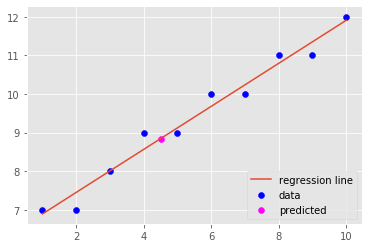

In [18]:
# Make prediction for x = 4.5 and visualize on the scatter plot

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

x_new = np.array([4.5])
y_predicted = reg_line(m,c,x_new)
y_predicted

plt.scatter(X,Y,label='data',color='blue')
plt.plot(X,regression_line,label='regression line')
plt.scatter(x_new,y_predicted,label='predicted',color='magenta')
plt.legend(loc=4)
plt.show()



## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 